<a href="https://colab.research.google.com/github/Riyaz402p/Classifcation_Infosys_Internship_Oct2024/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"debashritamandal","key":"f155fd31d4a5e6043c3113841f3676f7"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets list


ref                                                           title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
bhadramohit/customer-shopping-latest-trends-dataset           Customer Shopping (Latest Trends) Dataset       76KB  2024-11-23 15:26:12           2789         46  1.0              
ikynahidwin/depression-student-dataset                        Depression Student Dataset                       4KB  2024-11-20 06:42:01           2867         58  1.0              
mohitkumar282/used-car-dataset                                Used Car Dataset                               230KB  2024-11-24 09:14:58           1632         25  1.0              
octopusteam/full-imdb-dataset                                 Full IMDb Dataset (1M+)          

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog


Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 94% 205M/218M [00:01<00:00, 162MB/s]
100% 218M/218M [00:01<00:00, 196MB/s]


In [ ]:
!unzip cat-and-dog.zip -d /content/dataset


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/training_set/training_set/cats/cat.3704.jpg  
  inflating: /content/dataset/training_set/training_set/cats/cat.3705.jpg  
  inflating: /content/dataset/training_set/training_set/cats/cat.3706.jpg  
  inflating: /content/dataset/training_set/training_set/cats/cat.3707.jpg  
  inflating: /content/dataset/training_set/training_set/cats/cat.3708.jpg  
  inflating: /content/dataset/training_set/training_set/cats/cat.3709.jpg  
  inflating: /content/dataset/training_set/training_set/cats/cat.371.jpg  
  inflating: /content/dataset/training_set/training_set/cats/cat.3710.jpg  
  inflating: /content/dataset/training_set/training_set/cats/cat.3711.jpg  
  inflating: /content/dataset/training_set/training_set/cats/cat.3712.jpg  
  inflating: /content/dataset/training_set/training_set/cats/cat.3713.jpg  
  inflating: /content/dataset/training_set/training_set/cats/cat.3714.jpg  
  inflating: /content/dataset/training

In [ ]:
import os
for root, dirs, files in os.walk('/content/dataset/training_set'):
    print(f"Directory: {root}")
    print(f"Contains Directories: {dirs}")
    print(f"Contains Files: {len(files)} files")


Directory: /content/dataset/training_set
Contains Directories: ['training_set']
Contains Files: 0 files
Directory: /content/dataset/training_set/training_set
Contains Directories: ['dogs', 'cats']
Contains Files: 0 files
Directory: /content/dataset/training_set/training_set/dogs
Contains Directories: []
Contains Files: 4006 files
Directory: /content/dataset/training_set/training_set/cats
Contains Directories: []
Contains Files: 4001 files


In [ ]:
train_dir = '/content/dataset/training_set/training_set'


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = Sequential([
    Input(shape=(150, 150, 3)),  # Explicitly define input shape
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data generator
training_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

# Define paths
train_dir = '/content/dataset/training_set/training_set'

# Define training and validation generators
train_generator = training_generator.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = training_generator.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,  # Adjust the number of epochs if needed
    validation_data=validation_generator
)


Epoch 1/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 388s 2s/step - accuracy: 0.5620 - loss: 0.6898 - val_accuracy: 0.6352 - val_loss: 0.6406
Epoch 2/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 391s 2s/step - accuracy: 0.6348 - loss: 0.6363 - val_accuracy: 0.6758 - val_loss: 0.6126
Epoch 3/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 391s 2s/step - accuracy: 0.6756 - loss: 0.6042 - val_accuracy: 0.6852 - val_loss: 0.5920
Epoch 4/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 432s 2s/step - accuracy: 0.6877 - loss: 0.5906 - val_accuracy: 0.7021 - val_loss: 0.5712
Epoch 5/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 395s 2s/step - accuracy: 0.7033 - loss: 0.5674 - val_accuracy: 0.7058 - val_loss: 0.5523
Epoch 6/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 425s 2s/step - accuracy: 0.7159 - loss: 0.5630 - val_accuracy: 0.7171 - val_loss: 0.5516
Epoch 7/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 386s 2s/step - accuracy: 0.7138 - loss: 0.5559 - val_accuracy: 0.7202 - val_loss: 0.5462
Epoch 8/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 451s 2s/step - accuracy: 0.7264 - loss: 0.5419 - val_accu

In [ ]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 569ms/step - accuracy: 0.8072 - loss: 0.4528
Validation Loss: 0.46426403522491455
Validation Accuracy: 0.7938788533210754


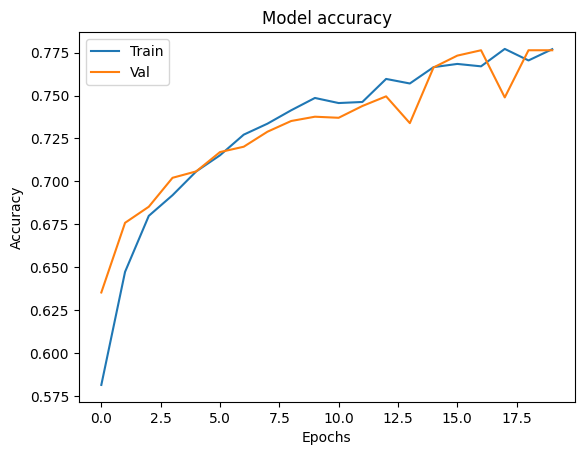

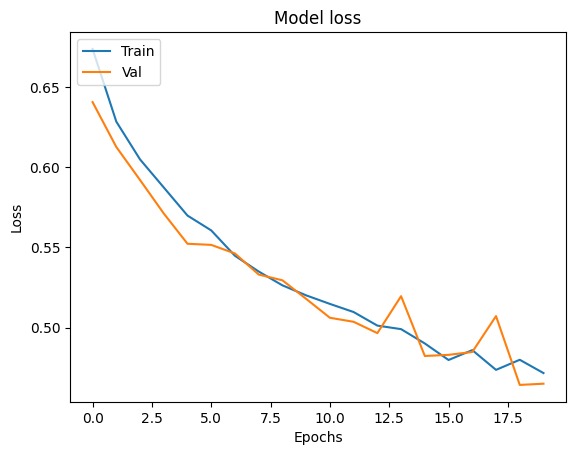

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [ ]:
img_path = 'cat.jpeg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


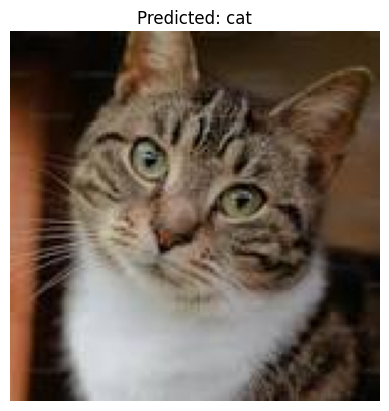

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

# Load the image
img_path = '/content/cat.jpeg'  # Replace with the actual image path
img = image.load_img(img_path, target_size=(150, 150))  # Resize the image to the same input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)  # Get the class with the highest probability

# Class names (update as per your dataset)
class_names = ['cat', 'dog']

# Display the image
plt.imshow(img)
plt.title(f"Predicted: {class_names[predicted_class[0]]}")
plt.axis('off')  # Turn off axis
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

# Load the image
img_path = '/content/cat.jpeg'  # Replace with the actual image path
img = image.load_img(img_path, target_size=(150, 150))  # Resize the image to the same input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)  # Get the class with the highest probability

# Class names (update as per your dataset)
class_names = ['cat', 'dog']

# Display the image
plt.imshow(img)
plt.title(f"Predicted: {class_names[predicted_class[0]]}")
plt.axis('off')  # Turn off axis
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/cat.jpeg'